In [10]:
import pandas as pd
bank_df = pd.read_csv('A:/Hackathon/bank.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [11]:
bank_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [12]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [13]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [14]:
numerical_feature_columns = list(bank_df._get_numeric_data().columns)
numerical_feature_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [15]:
categorical_feature_columns = list(set(bank_df.columns) - set(bank_df._get_numeric_data().columns))
categorical_feature_columns

['loan',
 'marital',
 'default',
 'month',
 'job',
 'contact',
 'education',
 'housing',
 'y',
 'poutcome']

In [16]:
def differentiateFeature(dataFrame):
    numerical_feature_columns = list(dataFrame._get_numeric_data().columns)
    categorical_feature_columns = list(set(dataFrame.columns) - set(dataFrame._get_numeric_data().columns))
    return numerical_feature_columns ,categorical_feature_columns

In [17]:
numericFeature , categoricalFeature = differentiateFeature(bank_df)

In [19]:
def findUniueValues(df,columnList):
    for i, col in enumerate(columnList):
        print(col,"::",df[col].unique())
        print()

findUniueValues(df,df.columns)

age :: [30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]

job :: ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']

marital :: ['married' 'single' 'divorced']

education :: ['primary' 'secondary' 'tertiary' 'unknown']

default :: ['no' 'yes']

balance :: [ 1787  4789  1350 ...  -333 -3313  1137]

housing :: ['no' 'yes']

loan :: ['no' 'yes']

contact :: ['cellular' 'unknown' 'telephone']

day :: [19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 18 12 21 26 22  2  4 15  8
 28  9  1 10 31 25 24]

month :: ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']

duration :: [  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148   96  140  109  125  169  182  247  119
  149   74 

In [23]:
bank_additional_df = pd.read_csv('A:/Hackathon/bank-additional.csv')
bank_additional_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [25]:
bank_additional_df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [24]:
bank_additional_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


In [26]:
bank_additional_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# listing Numeric and Categorical Columns separatly

In [27]:
numerical_feature_columns = list(bank_additional_df._get_numeric_data().columns)
numerical_feature_columns

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [28]:
categorical_feature_columns = list(set(bank_additional_df.columns) - set(bank_additional_df._get_numeric_data().columns))
categorical_feature_columns

['loan',
 'marital',
 'default',
 'month',
 'day_of_week',
 'job',
 'contact',
 'education',
 'housing',
 'y',
 'poutcome']

# Univariate Analysis for Numeric Features

In [38]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
#For some Statistics
from scipy.stats import norm, skew
from sklearn.preprocessing import Imputer
import statsmodels.api as sm

C:\Users\hegde\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


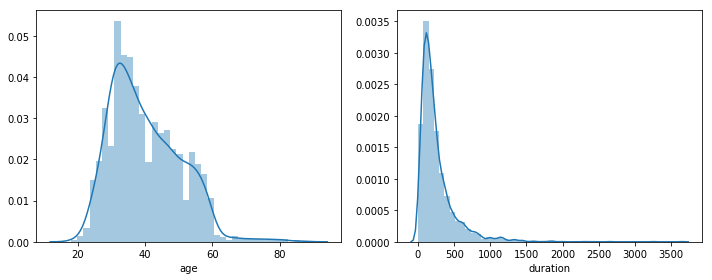

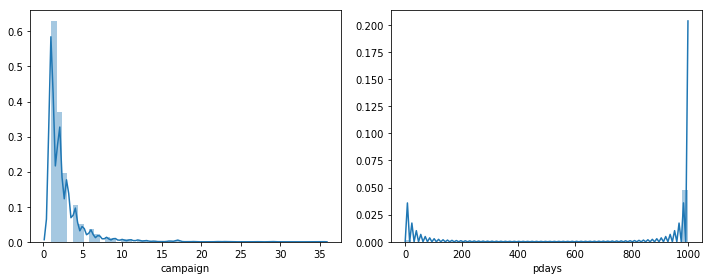

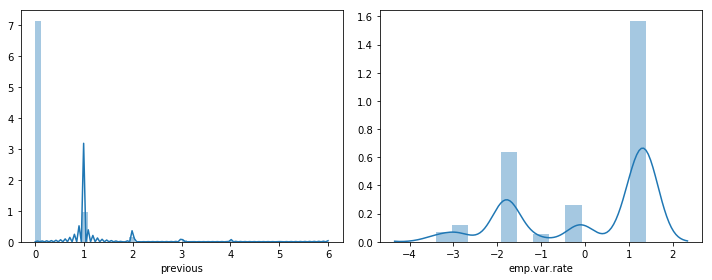

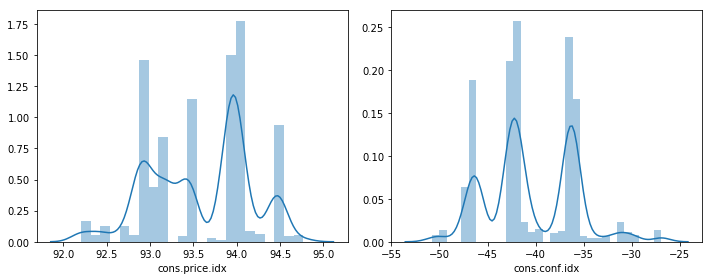

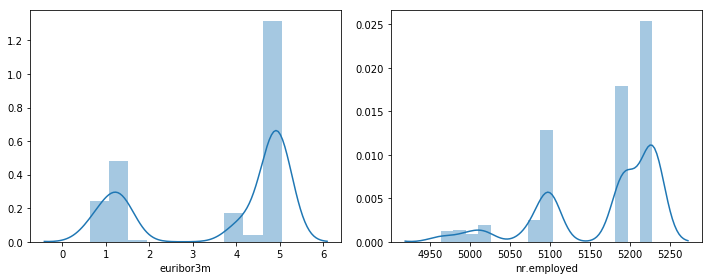

In [34]:
# Histograms

num_cols = ['age', 'duration', 'campaign', 'pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(bank_additional_df[num_cols[i]], hist=True, kde=True)
        plt.subplot(122)            
        sns.distplot(bank_additional_df[num_cols[i+1]], hist=True, kde=True)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(bank_additional_df[num_cols[i]], hist=True, kde=True)

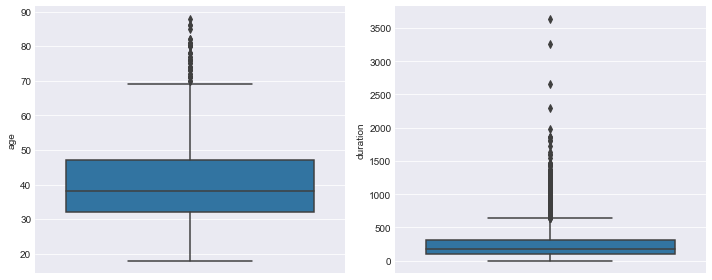

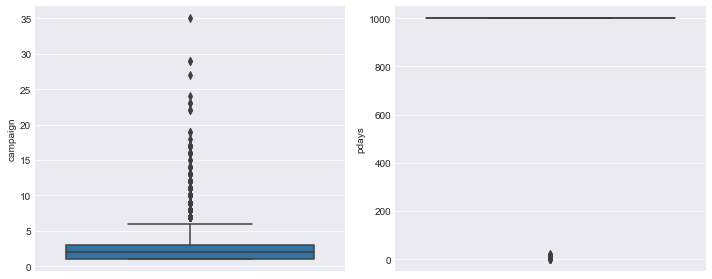

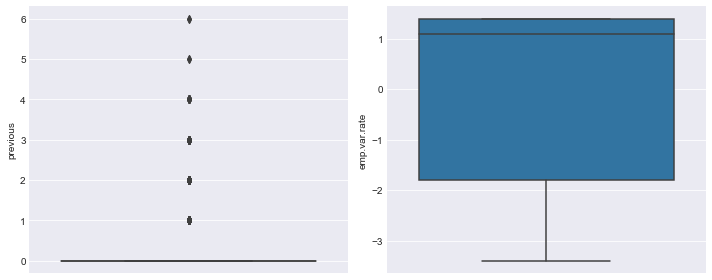

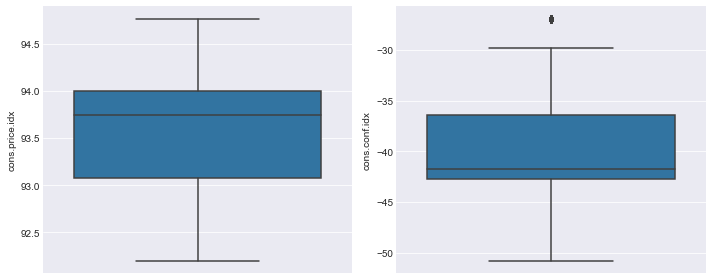

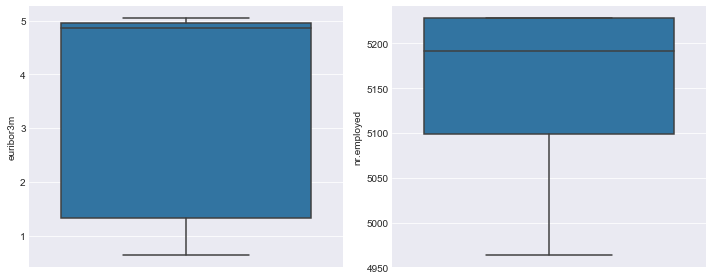

In [42]:
# BoxPlots

num_cols = ['age', 'duration', 'campaign', 'pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
facet = None
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(facet, num_cols[i],data = bank_additional_df)
        plt.subplot(122)            
        sns.boxplot(facet, num_cols[i+1],data = bank_additional_df)
        plt.tight_layout()
        plt.show()

    else:
        sns.boxplot(facet, num_cols[i],data = bank_additional_df)

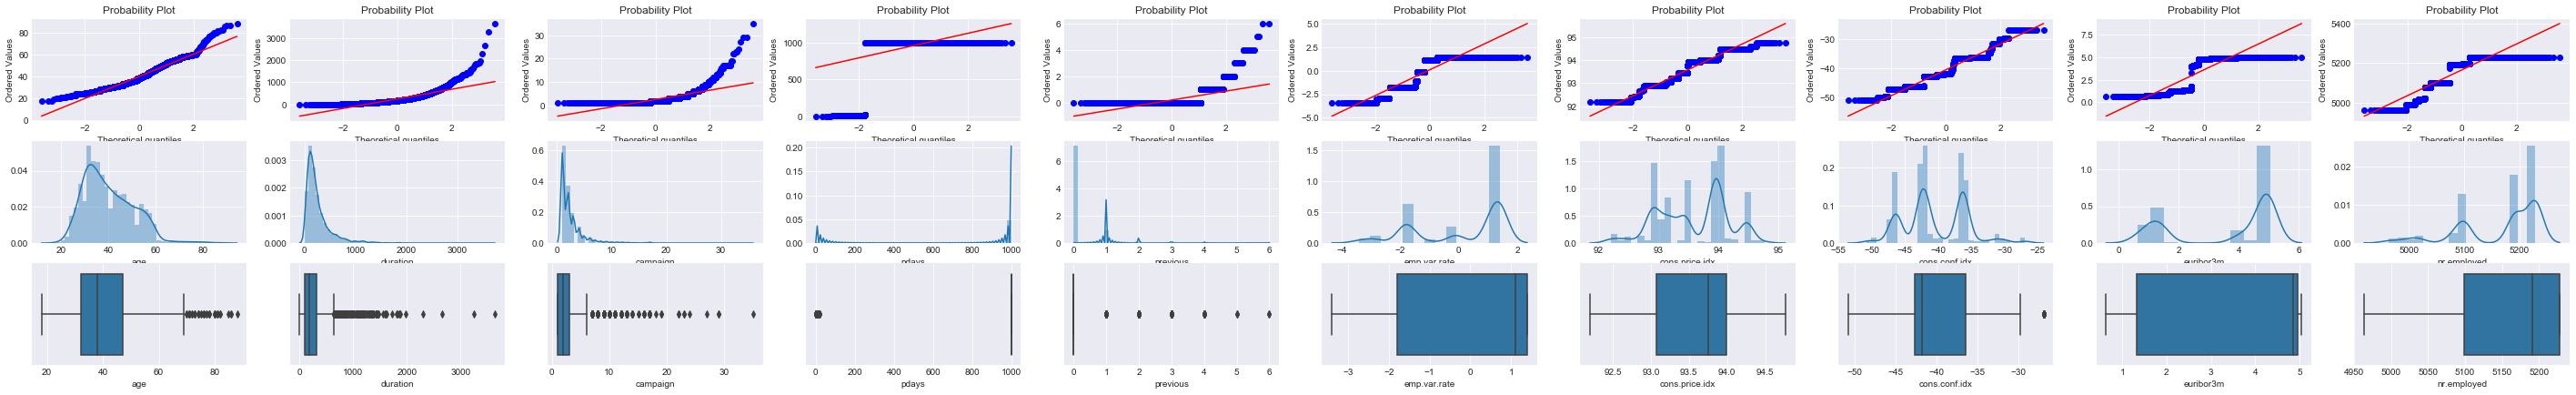

In [41]:
#Get all the plots at once
def printAllHistogram(dataFrame,columns):
    l = len(columns)
    plt.figure()
    f, axes = plt.subplots( 3,l, figsize=(50, 7), sharex=False)
    for i, col in enumerate(columns):
        sns.distplot(dataFrame[col],ax=axes[1,i])
        ax = axes[0,i]
        res = stats.probplot(dataFrame[col],plot=ax )
        sns.set_style("darkgrid")
        sns.boxplot(x=dataFrame[col],ax=axes[2,i])
printAllHistogram(bank_additional_df,num_cols)

# Observation from above plots

In [ ]:
Need more verification

# Univariate Analysis for Categorical Features

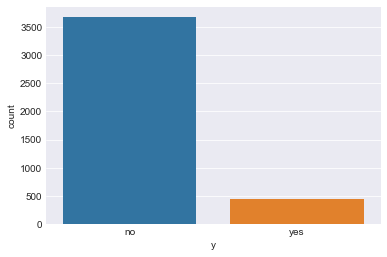

In [43]:
sns.countplot('y', data=bank_additional_df)

Since 'No' is more than 'Yes' dataset is imbalanced

# Month

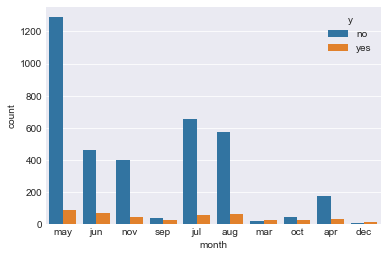

In [47]:
sns.countplot('month', data=bank_additional_df,hue='y')

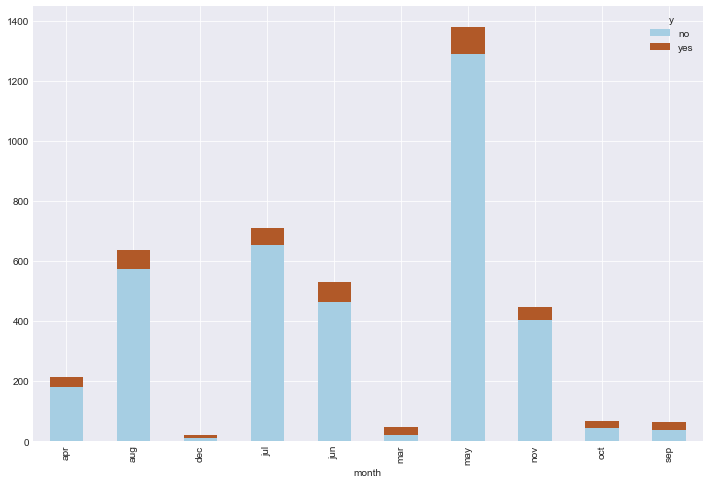

In [60]:
bank_month_crosstab = pd.crosstab(index=bank_additional_df.month,columns=bank_additional_df.y)
bank_month_crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')
bank_month_crosstab['bank_conv_rate'] = (bank_month_crosstab.yes/(bank_month_crosstab.no +bank_month_crosstab.yes))*100


In [58]:
print(bank_month_crosstab)

y        no  yes  bank_conv_rate
month                           
apr     187   28       13.023256
aug     562   74       11.635220
dec      21    1        4.545455
jul     621   90       12.658228
jun     476   54       10.188679
mar      43    5       10.416667
may    1230  148       10.740203
nov     399   47       10.538117
oct      61    8       11.594203
sep      51   13       20.312500


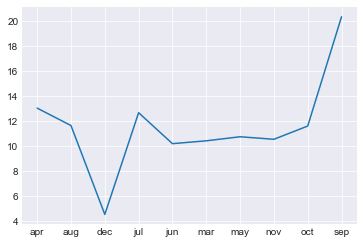

In [57]:
plt.plot(bank_month_crosstab.index, bank_month_crosstab['bank_conv_rate'])

# Day of week

Coversion rate for different months is different,
highest being september 

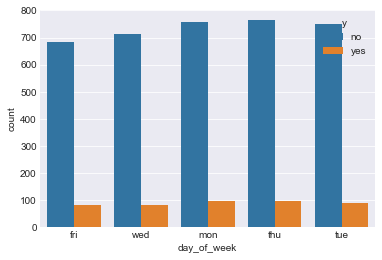

In [59]:
sns.countplot('day_of_week', data=bank_additional_df,hue='y')

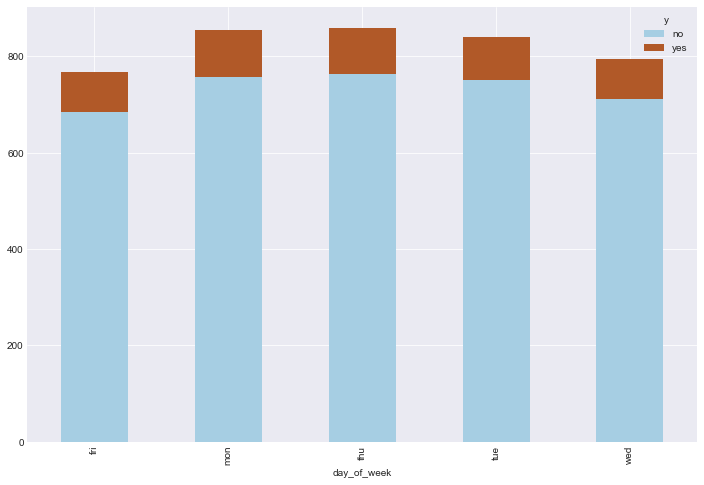

In [61]:
bank_dayofweek_crosstab = pd.crosstab(index=bank_additional_df.day_of_week,columns=bank_additional_df.y)
bank_dayofweek_crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')
bank_dayofweek_crosstab['conv_rate'] = (bank_dayofweek_crosstab.yes/(bank_dayofweek_crosstab.no +bank_dayofweek_crosstab.yes))*100

In [63]:
print(bank_dayofweek_crosstab)

y             no  yes  conv_rate
day_of_week                     
fri          685   83  10.807292
mon          757   98  11.461988
thu          764   96  11.162791
tue          750   91  10.820452
wed          712   83  10.440252


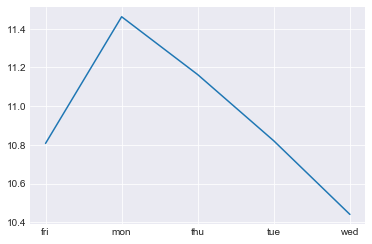

In [62]:
plt.plot(bank_dayofweek_crosstab.index, bank_dayofweek_crosstab['conv_rate'])

# Job

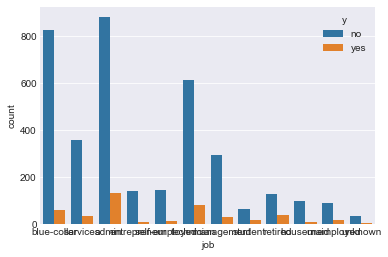

In [65]:
sns.countplot('job', data=bank_additional_df,hue='y')

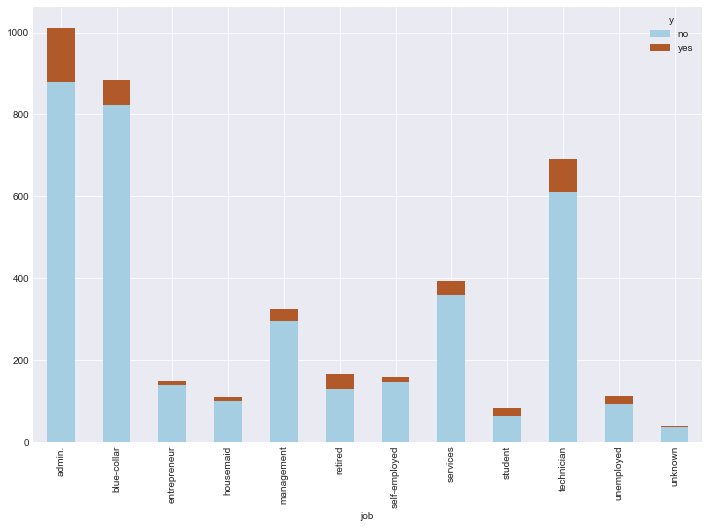

In [68]:
bank_job_crosstab = pd.crosstab(index=bank_additional_df.job,columns=bank_additional_df.y)
bank_job_crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')
bank_job_crosstab['conv_rate'] = (bank_job_crosstab.yes/(bank_job_crosstab.no +bank_job_crosstab.yes))*100

In [70]:
print(bank_job_crosstab)

y               no  yes  conv_rate
job                               
admin.         879  133  13.142292
blue-collar    823   61   6.900452
entrepreneur   140    8   5.405405
housemaid       99   11  10.000000
management     294   30   9.259259
retired        128   38  22.891566
self-employed  146   13   8.176101
services       358   35   8.905852
student         63   19  23.170732
technician     611   80  11.577424
unemployed      92   19  17.117117
unknown         35    4  10.256410


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

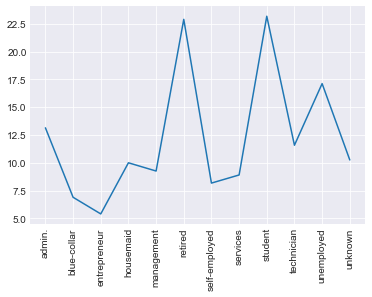

In [72]:
plt.plot(bank_job_crosstab.index, bank_job_crosstab['conv_rate'])
plt.xticks(rotation =90)

From above plot we get to know that Retired and Students are the ones who have subcribed

# Marital

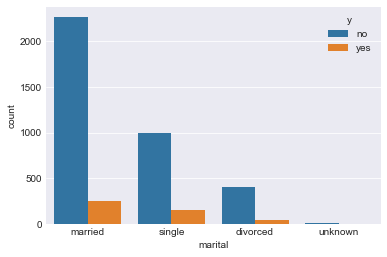

In [73]:
sns.countplot('marital', data=bank_additional_df,hue='y')

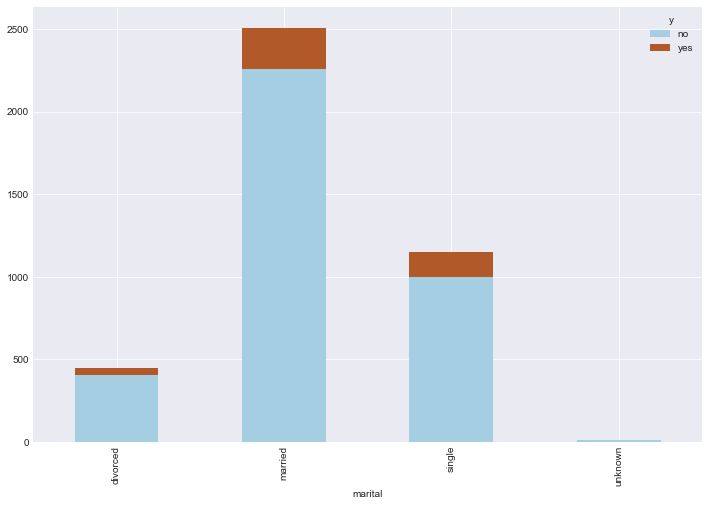

In [75]:
bank_marital_crosstab = pd.crosstab(index=bank_additional_df.marital,columns=bank_additional_df.y)
bank_marital_crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')
bank_marital_crosstab['conv_rate'] = (bank_marital_crosstab.yes/(bank_marital_crosstab.no +bank_marital_crosstab.yes))*100

In [76]:
print(bank_marital_crosstab)

y           no  yes  conv_rate
marital                       
divorced   403   43   9.641256
married   2257  252  10.043842
single     998  155  13.443192
unknown     10    1   9.090909


([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

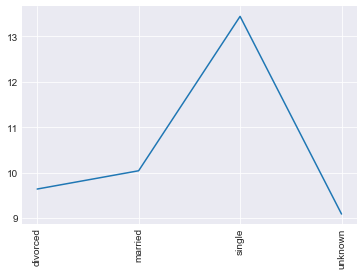

In [77]:
plt.plot(bank_marital_crosstab.index, bank_marital_crosstab['conv_rate'])
plt.xticks(rotation =90)

From above observation, students are the ones who are most likely to subscribe

# Education

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

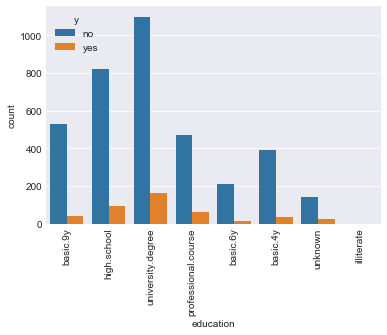

In [79]:
sns.countplot('education', data=bank_additional_df,hue='y')
plt.xticks(rotation =90)

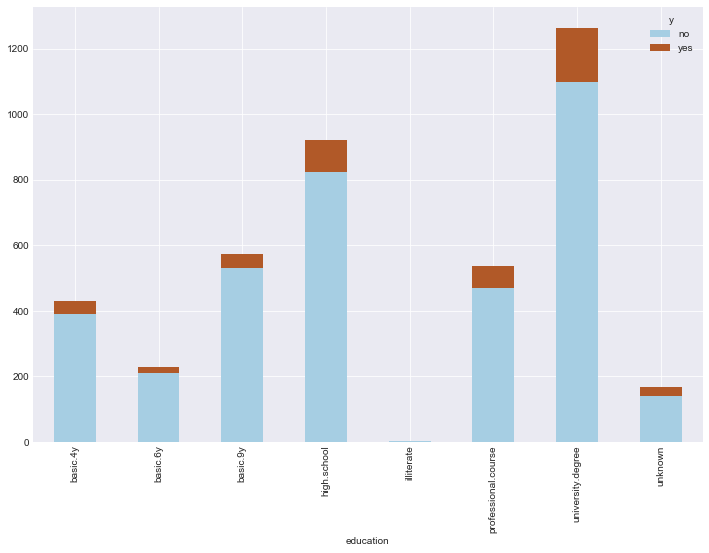

In [80]:
bank_education_crosstab = pd.crosstab(index=bank_additional_df.education,columns=bank_additional_df.y)
bank_education_crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')
bank_education_crosstab['conv_rate'] = (bank_education_crosstab.yes/(bank_education_crosstab.no +bank_education_crosstab.yes))*100

In [81]:
print(bank_education_crosstab)

y                      no  yes  conv_rate
education                                
basic.4y              391   38   8.857809
basic.6y              211   17   7.456140
basic.9y              531   43   7.491289
high.school           824   97  10.532030
illiterate              1    0   0.000000
professional.course   470   65  12.149533
university.degree    1099  165  13.053797
unknown               141   26  15.568862


([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

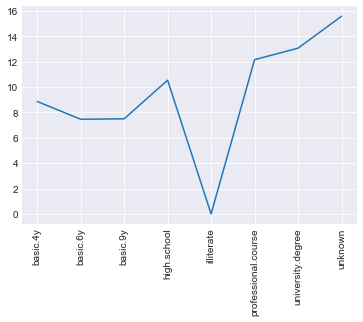

In [82]:
plt.plot(bank_education_crosstab.index, bank_education_crosstab['conv_rate'])
plt.xticks(rotation =90)

People having University degrees are most likely to subcribe

# housing

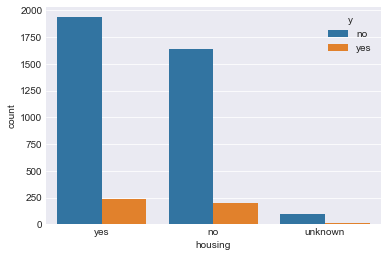

In [83]:
sns.countplot('housing', data=bank_additional_df,hue='y')

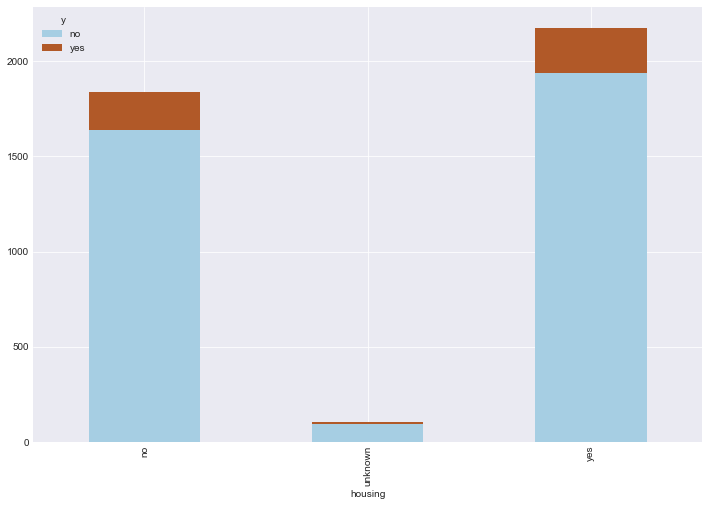

In [84]:
bank_housing_crosstab = pd.crosstab(index=bank_additional_df.housing,columns=bank_additional_df.y)
bank_housing_crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')
bank_housing_crosstab['conv_rate'] = (bank_housing_crosstab.yes/(bank_housing_crosstab.no +bank_housing_crosstab.yes))*100

In [85]:
print(bank_housing_crosstab)

y          no  yes  conv_rate
housing                      
no       1637  202  10.984231
unknown    96    9   8.571429
yes      1935  240  11.034483


([0, 1, 2], <a list of 3 Text xticklabel objects>)

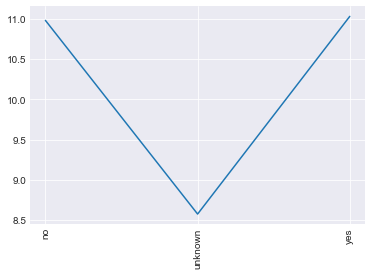

In [86]:
plt.plot(bank_housing_crosstab.index, bank_housing_crosstab['conv_rate'])
plt.xticks(rotation =90)

# Loan

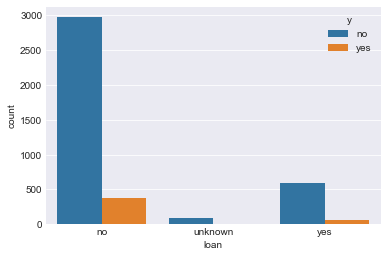

In [88]:
sns.countplot('loan', data=bank_additional_df,hue='y')

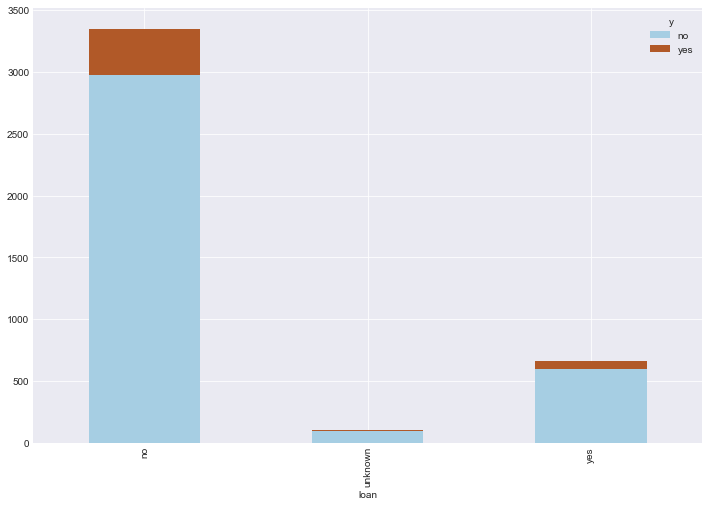

In [89]:
bank_loan_crosstab = pd.crosstab(index=bank_additional_df.loan,columns=bank_additional_df.y)
bank_loan_crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')
bank_loan_crosstab['conv_rate'] = (bank_loan_crosstab.yes/(bank_loan_crosstab.no +bank_loan_crosstab.yes))*100

In [91]:
print(bank_loan_crosstab)

y          no  yes  conv_rate
loan                         
no       2975  374  11.167513
unknown    96    9   8.571429
yes       597   68  10.225564


([0, 1, 2], <a list of 3 Text xticklabel objects>)

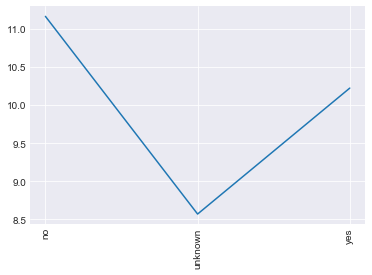

In [92]:
plt.plot(bank_loan_crosstab.index, bank_loan_crosstab['conv_rate'])
plt.xticks(rotation =90)

In [ ]:
If no personal loans, then most likely to subcribe

# contact

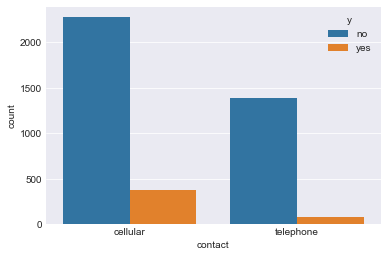

In [93]:
sns.countplot('contact', data=bank_additional_df,hue='y')

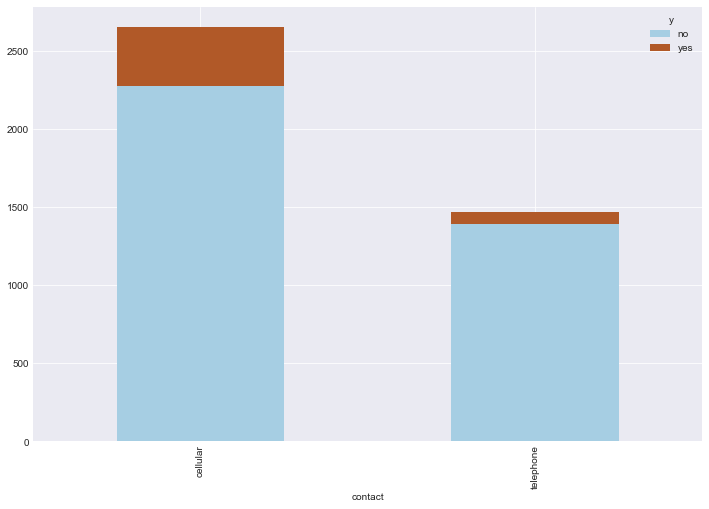

In [96]:
bank_contact_crosstab = pd.crosstab(index=bank_additional_df.contact,columns=bank_additional_df.y)
bank_contact_crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')
bank_contact_crosstab['conv_rate'] = (bank_contact_crosstab.yes/(bank_contact_crosstab.no +bank_contact_crosstab.yes))*100

In [97]:
print(bank_contact_crosstab)

y            no  yes  conv_rate
contact                        
cellular   2277  375  14.140271
telephone  1391   76   5.180641


([0, 1], <a list of 2 Text xticklabel objects>)

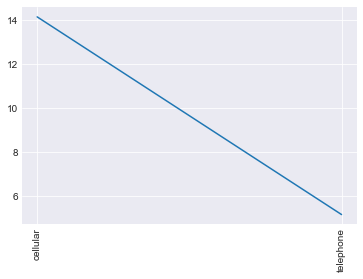

In [98]:
plt.plot(bank_contact_crosstab.index, bank_contact_crosstab['conv_rate'])
plt.xticks(rotation =90)

if communication type is cellular conv rate is more

# Poutcome

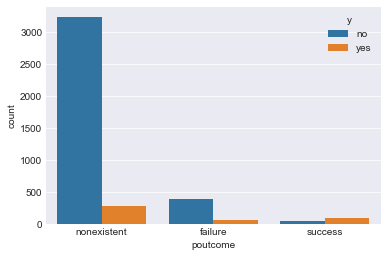

In [106]:
sns.countplot('poutcome', data=bank_additional_df,hue='y')

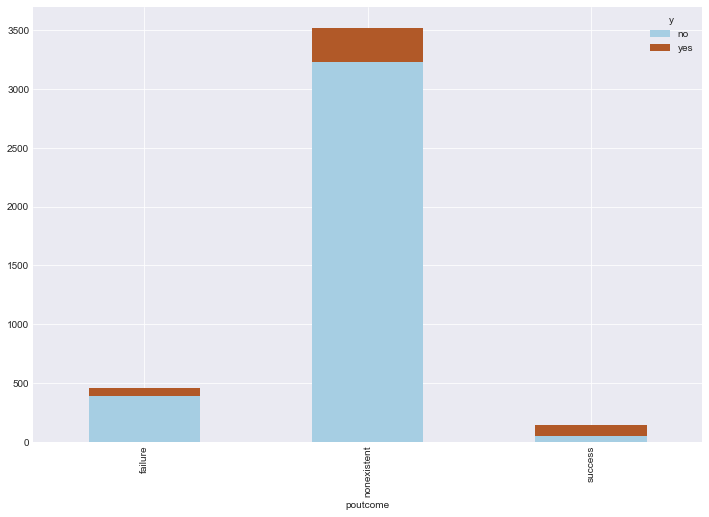

In [108]:
bank_poutcome_crosstab = pd.crosstab(index=bank_additional_df.poutcome,columns=bank_additional_df.y)
bank_poutcome_crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')
bank_poutcome_crosstab['conv_rate'] = (bank_poutcome_crosstab.yes/(bank_poutcome_crosstab.no +bank_poutcome_crosstab.yes))*100

In [102]:
print(bank_poutcome_crosstab)

y              no  yes  conv_rate
poutcome                         
failure       387   67  14.757709
nonexistent  3231  292   8.288391
success        50   92  64.788732


([0, 1, 2], <a list of 3 Text xticklabel objects>)

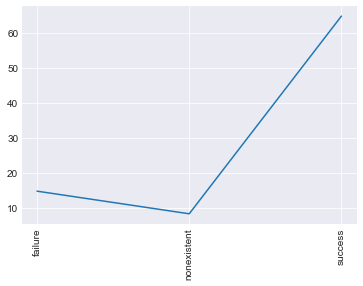

In [104]:
plt.plot(bank_poutcome_crosstab.index, bank_poutcome_crosstab['conv_rate'])
plt.xticks(rotation =90)

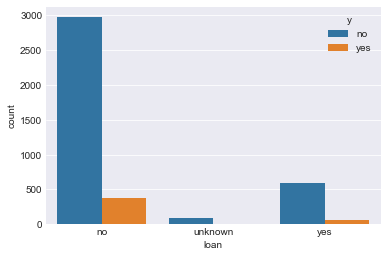

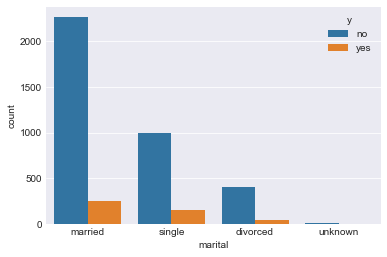

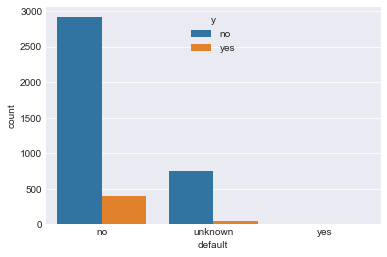

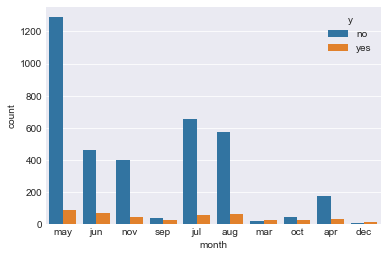

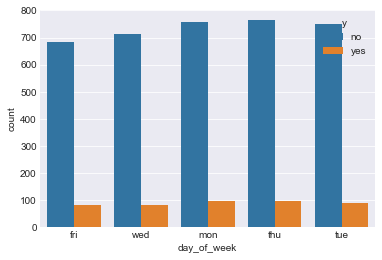

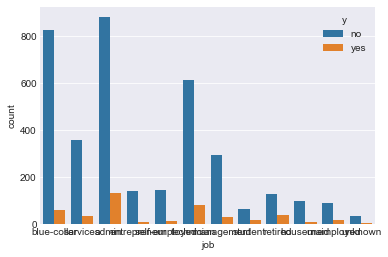

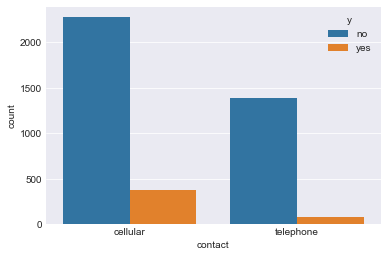

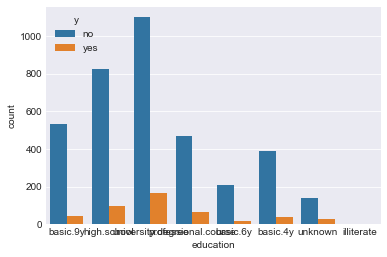

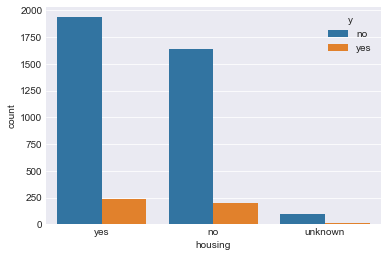

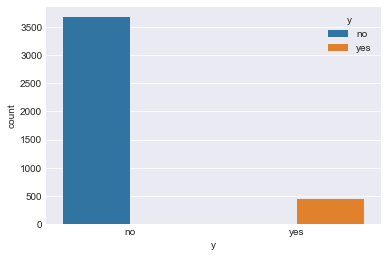

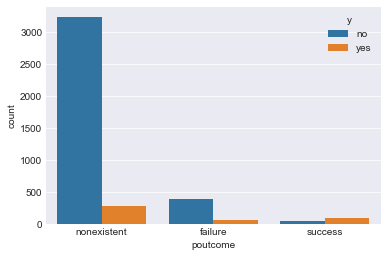

In [50]:
cat_col = ['loan','marital','default','month','day_of_week','job','contact','education','housing','y','poutcome']
def catagoricalUnivariant(dataFrame,columnsList):
    l = len(columnsList)
    for i, col in enumerate(columnsList):
        plt.figure(i)
        sns.countplot(col, data=dataFrame,hue="y")
catagoricalUnivariant(bank_additional_df,cat_col)
#f, axes = plt.subplots( 1,l, figsize=(50, 7), sharex=False)

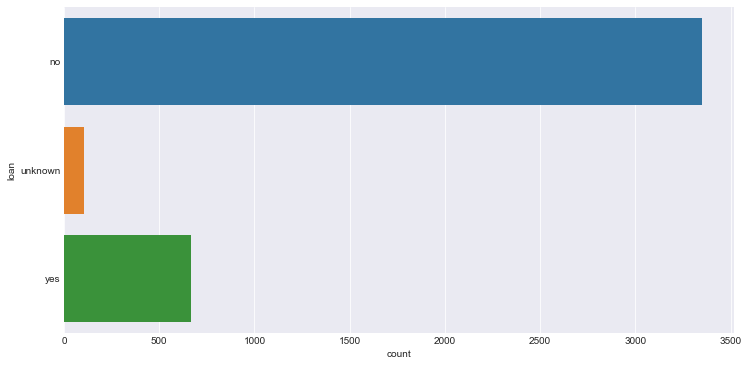

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(y='loan', data=bank_additional_df)

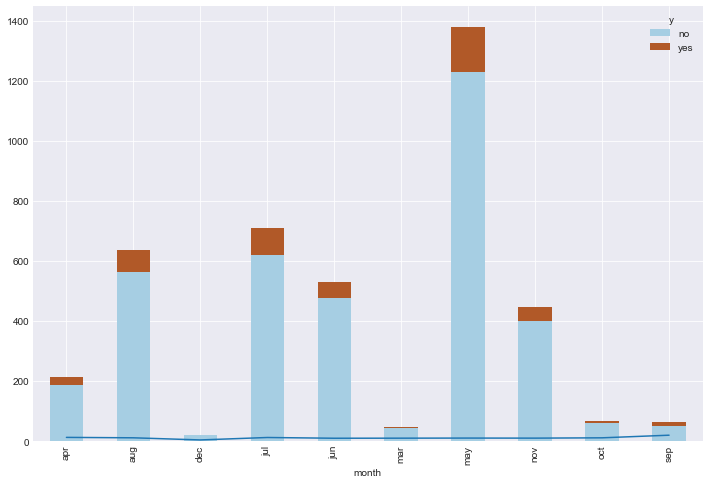

In [52]:
bank_month_crosstab = pd.crosstab(index=bank_additional_df.month,columns=bank_df.y)
bank_month_crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')
bank_month_crosstab['bank_conv_rate'] = (bank_month_crosstab.yes/(bank_month_crosstab.no +bank_month_crosstab.yes))*100
bank_month_crosstab
plt.plot(bank_month_crosstab.index, bank_month_crosstab['bank_conv_rate'])